# A minimal ALF run

In this bare-bones example we use the [pyALF](https://git.physik.uni-wuerzburg.de/ALF/pyALF) interface to run the canonical Hubbard model on a default configuration: a $6\times6$ square grid, with interaction strength $U=4$ and inverse temperature $\beta = 5$.  

Bellow we go through the steps for performing the simulation and outputting observables.

---

**1.** Import `Simulation` class from the `py_alf` python module, which provides the interface with ALF:

In [3]:
import os
import numpy as np
from py_alf import Simulation              # Interface with ALF

**2.** Create an instance of `Simulation`, setting parameters as desired:

In [4]:
sim = Simulation(
    "Hubbard",                             # Hamiltonian
    {                                      # Model and simulation parameters for each Simulation instance
    "Model": "Hubbard",                    # Base model
    "Lattice_type": "Square"},             # Lattice type
    alf_dir=os.getenv('ALF_DIR', './ALF'), # Directory with ALF source code. Gets it from 
                                           # environment variable ALF_DIR, if present
)

**3.** Compile ALF, downloading it first from the [ALF repository](https://git.physik.uni-wuerzburg.de:ALF) if not found locally. This may take a few minutes:

In [3]:
sim.compile()                              # Compilation needs to be performed only once

Compiling ALF... Done.


**4.** Perform the simulation as specified in `sim`:

In [4]:
sim.run()                                  # Perform the actual simulation in ALF

Prepare directory "/home/jschwab/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square" for Monte Carlo run.
Create new directory.
Run /home/jschwab/Programs/ALF/Prog/ALF.out


**New:** Derived observables

In [ ]:
def R_k(obs, back, sign, N_orb, N_tau, dtau, latt, ks=[[0., 0.]], mat=None):
    # obs.shape = (N_orb, N_orb, N_tau, latt.N)
    if mat is None:
        mat = np.identity(N_orb)
    out = 0
    for k in ks:
        n = latt.k_to_n(k)

        J1 = (obs[..., n].sum(axis=-1) * mat).sum()
        J2 = 0
        for i in latt.NNk(n):
            J2 = J2 + (obs[..., i].sum(axis=-1) * mat).sum() / len(latt.NNk(n))
        out += (1 - J2/J1)

    return out / len(ks)

In [ ]:
sim.add_observable({
    'name': 'R_AFM',
    'needs': ['Spin_eq'],
    'function': R_k,
    'kwargs': {'ks': [[np.pi, np.pi]]}
})

**New:** Check warmup and autocorrelation

In [ ]:
sim.check_warmup(['Ener_scal', 'R_AFM'])

In [ ]:
sim.check_rebin(['Ener_scal', 'R_AFM'])

**5.** Perform some simple analyses:

In [3]:
sim.analysis(python_version=False)                             # Perform default analysis; list observables

Analysing Kin_scal
Analysing Part_scal
Analysing Ener_scal
Analysing Pot_scal
Analysing SpinZ_eq
Analysing Den_eq
Analysing Green_eq
Analysing SpinT_eq
Analysing SpinXY_eq
Analysing Den_tau
Analysing SpinXY_tau
Analysing Green_tau
Analysing SpinT_tau
Analysing SpinZ_tau


In [7]:
sim.analysis(python_version=True)
#Python analysis with plain-text bins is not very robust

### Analyzing /home/jschwab/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square ###
/home/jschwab/Programs/pyALF/Notebooks
Scalar observables:
Kin_scal


ValueError: complex() arg is a malformed string

**6.** Store computed observables list:

In [5]:
obs = sim.get_obs()                        # Dictionary for the observables

/home/jschwab/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square/Kin_scalJ 1
/home/jschwab/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square/Part_scalJ 1
/home/jschwab/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square/Ener_scalJ 1
/home/jschwab/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square/Pot_scalJ 1


In [6]:
obs


,Den_eqK,Den_eqK_err,Den_eqK_k,Den_eqR,Den_eqR_err,Den_eqR_r,Ener_scal0,Ener_scal0_err,Ener_scal_sign,Ener_scal_sign_err,...,SpinXY_eqK_k,SpinXY_eqR,SpinXY_eqR_err,SpinXY_eqR_r,SpinZ_eqK,SpinZ_eqK_err,SpinZ_eqK_k,SpinZ_eqR,SpinZ_eqR_err,SpinZ_eqR_r
/home/jschwab/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square,[[[(0.3404085320800765+0.0013986473259414395j)...,[[[(1.386051912456885e-15+3.2564778139058525e-...,"[[-2.0943951023931953, -2.0943951023931953], [...",[[[(-0.0009646846002630107+5.063245258581361e-...,[[[(-1.5085081300283012e-16+5.758314180521012e...,"[[-2.0, -2.0], [-2.0, -1.0], [-2.0, 0.0], [-2....",-29.893866,0.109235,1.0,0.0,...,"[[-2.0943951023931953, -2.0943951023931953], [...",[[[(0.08372789528656875+0.020522796910492747j)...,[[[(2.4229535243926305e-17+7.10950297505538e-1...,"[[-2.0, -2.0], [-2.0, -1.0], [-2.0, 0.0], [-2....",[[[(0.8192746380334336+0.04615056742348321j)]]...,[[[(-3.243145860885386e-17+8.020606551049989e-...,"[[-2.0943951023931953, -2.0943951023931953], [...",[[[(0.11139094429746181+0.04571527963439694j)]...,[[[(3.756781463752667e-17+2.1662506598003815e-...,"[[-2.0, -2.0], [-2.0, -1.0], [-2.0, 0.0], [-2...."


which are available for further analyses. For instance, the internal energy of the system (and its error) is accessed by:

In [11]:
obs[['Ener_scal0', 'Ener_scal0_err', 'Ener_scal_sign', 'Ener_scal_sign_err']]

,Ener_scal0,Ener_scal0_err,Ener_scal_sign,Ener_scal_sign_err
/home/jschwab/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square,-29.893866,0.109235,1.0,0.0


**New:** 2dplot on bravais lattice

In [7]:
from alf_ana.lattice import Lattice
import matplotlib.pyplot as plt

In [2]:
# Lattice should be stored in obs
L1 = [6, 0]
L2 = [0, 6]
a1 = [1, 0]
a2 = [0, 1]
latt = Lattice(L1, L2, a1, a2)

TypeError: plot_r() missing 3 required positional arguments: 'ax', 'data', and 'cmap'

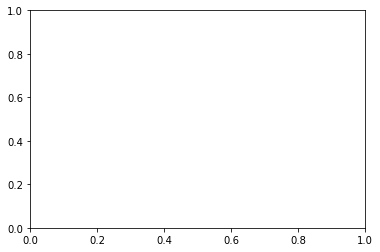

In [8]:
fig, ax = plt.subplots(1, 1)
latt.plot_r(ax, )

In [6]:
for i in obs.columns:
    print(i)

Den_eqK
Den_eqK_err
Den_eqK_k
Den_eqR
Den_eqR_err
Den_eqR_r
Ener_scal0
Ener_scal0_err
Ener_scal_sign
Ener_scal_sign_err
Green_eqK
Green_eqK_err
Green_eqK_k
Green_eqR
Green_eqR_err
Green_eqR_r
Kin_scal0
Kin_scal0_err
Kin_scal_sign
Kin_scal_sign_err
Part_scal0
Part_scal0_err
Part_scal_sign
Part_scal_sign_err
Pot_scal0
Pot_scal0_err
Pot_scal_sign
Pot_scal_sign_err
SpinT_eqK
SpinT_eqK_err
SpinT_eqK_k
SpinT_eqR
SpinT_eqR_err
SpinT_eqR_r
SpinXY_eqK
SpinXY_eqK_err
SpinXY_eqK_k
SpinXY_eqR
SpinXY_eqR_err
SpinXY_eqR_r
SpinZ_eqK
SpinZ_eqK_err
SpinZ_eqK_k
SpinZ_eqR
SpinZ_eqR_err
SpinZ_eqR_r


---
**7.** Running again: The simulation can be resumed to increase the precision of the results.

In [8]:
sim.run()
sim.analysis()
obs2 = sim.get_obs()
print(obs2['Ener_scalJ']['obs'])
print("\nRunning again reduced the error from ", obs['Ener_scalJ']['obs'][0][1]," to ", obs2['Ener_scalJ']['obs'][0][1], ".")

Prepare directory "/home/stafusa/ALF/pyALF/Notebooks/ALF_data/Hubbard_Square" for Monte Carlo run.
Resuming previous run.
Run /home/stafusa/ALF/ALF/Prog/Hubbard.out
Analysing Ener_scal
Analysing Part_scal
Analysing Pot_scal
Analysing Kin_scal
Analysing Den_eq
Analysing SpinZ_eq
Analysing Green_eq
Analysing SpinXY_eq
Analysing SpinT_eq
Analysing SpinXY_tau
Analysing SpinZ_tau
Analysing Den_tau
Analysing Green_tau
Analysing SpinT_tau
/home/stafusa/ALF/pyALF/Notebooks/ALF_data/Hubbard_Square/Kin_scalJ 1
/home/stafusa/ALF/pyALF/Notebooks/ALF_data/Hubbard_Square/Part_scalJ 1
/home/stafusa/ALF/pyALF/Notebooks/ALF_data/Hubbard_Square/Ener_scalJ 1
/home/stafusa/ALF/pyALF/Notebooks/ALF_data/Hubbard_Square/Pot_scalJ 1
[[-29.839345   0.049995]]

Running again reduced the error from  0.109235  to  0.049995 .


**Note**: To run a fresh simulation - instead of performing a refinement over previous run(s) - the Monte Carlo run directory should be deleted before rerunning.

---
## Exercises
1. Rerun once again and check the new improvement in precision.
2. Look at a few other observables (`sim.analysis()` outputs the names of those available).
3. Change the lattice size by adding, e.g., `"L1": 4,` and `"L2": 1,` to the simulation parameters definitions of `sim` (step 2).